# FDNY analysis challenge 
The New York City Fire Department keeps a log of detailed information on incidents handled by FDNY units. In this challenge I worked on a dataset that contains a record of incidents handled by FDNY units from 2013-2019.

This challenge was very difficult.... but I learned so much during the process. I expanded my knowledge and skills more than ever. 

In [15]:
# Import relevant library 
import pandas as pd
# Importing the data into jupyter notebook 
fdny = pd.read_csv("data/Incidents_Responded_to_by_Fire_Companies.csv", low_memory=False)

**What proportion of FDNY responses in this dataset correspond to the most common type of incident?**

In [17]:
# Calculating the proportion of most common type of incident
fdny['INCIDENT_TYPE_DESC'].value_counts(normalize=True) * 100

300 - Rescue, EMS incident, other                          35.988610
651 - Smoke scare, odor of smoke                            6.427215
353 - Removal of victim(s) from stalled elevator            5.221184
710 - Malicious, mischievous false call, other              5.140073
522 - Water or steam leak                                   4.872084
                                                             ...    
170 - Cultivated vegetation, crop fire, other               0.000119
121 - Fire in mobile home used as fixed residence           0.000119
173 - Cultivated trees or nursery stock fire                0.000079
136 - Self-propelled motor home or recreational vehicle     0.000079
172 - Cultivated orchard or vineyard fire                   0.000040
Name: INCIDENT_TYPE_DESC, Length: 182, dtype: float64

**How many times more likely is an incident in Staten Island a false call compared to in Manhattan? The answer should be the ratio of Staten Island false call rate to Manhattan false call rate. A false call is an incident for which 'INCIDENT_TYPE_DESC' is '710 - Malicious, mischievous false call, other'.**

In [18]:
#Checking the borough (town) of incidents
fdny.BOROUGH_DESC.value_counts()

4 - Brooklyn         731297
1 - Manhattan        641825
5 - Queens           509106
2 - Bronx            505899
3 - Staten Island    130631
Name: BOROUGH_DESC, dtype: int64

In [59]:
# Subsetting fdny data frame to extract columns with false call + from Staten Island
false_call_staten = fdny[(fdny["INCIDENT_TYPE_DESC"]=="710 - Malicious, mischievous false call, other") & (fdny["BOROUGH_DESC"]=="3 - Staten Island")]
#Calculating number of rows with criteria == false call + Staten
stat_total_rows = len(false_call_staten)
stat_total_rows

8989

In [64]:
# Subsetting fdny data frame to extract columns with false call + from Manhattan
false_call_manhattan = fdny[(fdny["INCIDENT_TYPE_DESC"]=="710 - Malicious, mischievous false call, other") & (fdny["BOROUGH_DESC"]=="1 - Manhattan")]
#Calculating number of rows with criteria == false call + Manhattan
manh_total_rows = len(false_call_manhattan)
manh_total_rows

27551

In [61]:
#To calculate ratios you need to divide both sides by the greatest common divisor.
# Creating a function for gcd:
def gcd(a, b):
    """Calculate the Greatest Common Divisor of a and b.

    Unless b==0, the result will have the same sign as b (so that when
    b is divided by it, the result comes out positive).
    """
    while b:
        a, b = b, a%b
    return a

In [66]:
# calculating gcd for total number of times false calls are reported in Staten and Manhattan
gcd(stat_total_rows,manh_total_rows)
# We will try and round off the false call for manhattan and staten to the nearest one thousand 

1

In [67]:
# rounding off to nearest 1000
manh_total_rows = round(manh_total_rows, ndigits=-3)
stat_total_rows = round(stat_total_rows, ndigits=-3)

In [68]:
# Find greatest commond divisor so as to calculate ratio
gcd = gcd(manh_total_rows, stat_total_rows)

In [69]:
gcd

1000

In [70]:
# Divide both sides by GCD if it is not equal to 1, if it is equal to one leave it as it is
if gcd == 1:
    print("Ratio of Staten Island false call rate to Manhattan false call rate is", stat_total_rows,":", manh_total_rows)
else: 
    manh_total_rows = manh_total_rows/gcd
    stat_total_rows = stat_total_rows /gcd
    print("Ratio of Staten Island false call rate to Manhattan false call rate is", stat_total_rows,":", manh_total_rows)

Ratio of Staten Island false call rate to Manhattan false call rate is 9.0 : 28.0


In [71]:
# representing ratio as float value
stat_total_rows/manh_total_rows

0.32142857142857145

**What is the ratio of the average number of units that arrive to a scene of an incident classified as '111 - Building fire' to the number that arrive for '651 - Smoke scare, odor of smoke'?**

In [30]:
# Subsetting fdny data frame to select incidents reported as "111 - Building fire" and the the total units that arrived at scene each time
building_fire = fdny.loc[fdny.INCIDENT_TYPE_DESC == "111 - Building fire", ["UNITS_ONSCENE","INCIDENT_TYPE_DESC"]]
building_fire

,UNITS_ONSCENE,INCIDENT_TYPE_DESC
91,15.0,111 - Building fire
199,9.0,111 - Building fire
440,23.0,111 - Building fire
492,6.0,111 - Building fire
569,13.0,111 - Building fire
...,...,...
2517681,11.0,111 - Building fire
2517770,13.0,111 - Building fire
2518063,17.0,111 - Building fire
2518123,17.0,111 - Building fire


In [31]:
# Calculating the average number of units that arrive at a scene classified as '111 - Building fire'
building_fire.UNITS_ONSCENE.mean()

11.220102505694761

In [43]:
# Saving mean of average units on scene classified as building fire to a variable 
building_fire_mean = round(building_fire.UNITS_ONSCENE.mean())

In [33]:
# Subsetting fdny data frame to select incidents reported as "651 - Smoke scare, odor of 
#smoke" and the total units that arrived at scene each time
smoke_scare = fdny.loc[fdny.INCIDENT_TYPE_DESC == "651 - Smoke scare, odor of smoke", ["UNITS_ONSCENE","INCIDENT_TYPE_DESC"]]
smoke_scare

,UNITS_ONSCENE,INCIDENT_TYPE_DESC
7,4.0,"651 - Smoke scare, odor of smoke"
17,6.0,"651 - Smoke scare, odor of smoke"
19,5.0,"651 - Smoke scare, odor of smoke"
22,6.0,"651 - Smoke scare, odor of smoke"
37,6.0,"651 - Smoke scare, odor of smoke"
...,...,...
2518563,5.0,"651 - Smoke scare, odor of smoke"
2518606,1.0,"651 - Smoke scare, odor of smoke"
2518615,6.0,"651 - Smoke scare, odor of smoke"
2518631,6.0,"651 - Smoke scare, odor of smoke"


In [34]:
smoke_scare.UNITS_ONSCENE.mean()

4.005524003628817

In [45]:
# Saving mean of average units on scene classified as smoke scare to a variable 
smoke_scare_mean = round(smoke_scare.UNITS_ONSCENE.mean())

In [52]:
gcd = gcd(building_fire_mean,smoke_scare_mean)

In [53]:
# Checkpoint for gcd
# Divide both sides by GCD if it is not equal to 1, if it is equal to one leave it as it is
if gcd == 1:
    print("Ratio of average units on scene classified as Building fire to Smoke scare is", building_fire_mean,":", smoke_scare_mean)
else: 
    building_fire_mean = building_fire_mean/gcd
    smoke_scare_mean = smoke_scare_mean /gcd
    print("Ratio of average units on scene classified as Building fire to Smoke scare is", building_fire_mean,":", smoke_scare_mean)

Ratio of average units on scene classified as Building fire to Smoke scare is 11 : 4


In [56]:
# representing ratio as a float value
building_fire_mean/smoke_scare_mean

2.75

**Check the distribution of the number of minutes it takes between the time a '111 - Building fire' incident has been logged into the Computer Aided Dispatch system and the time at which the first unit arrives on scene. What is the third quartile of that distribution. Note: the number of minutes can be fractional (ie, do not round).**

In [115]:
# Converting to time data
fdny["ARRIVAL_DATE_TIME"] = pd.to_datetime(fdny["ARRIVAL_DATE_TIME"])

In [116]:
# Converting to time data
fdny["INCIDENT_DATE_TIME"] = pd.to_datetime(fdny["INCIDENT_DATE_TIME"])

In [121]:
# subsetting data frame to extract columns with incident as building and also extracting arrival time and incident time
time_stamp = fdny.loc[fdny.INCIDENT_TYPE_DESC == "111 - Building fire", ["ARRIVAL_DATE_TIME","INCIDENT_TYPE_DESC","INCIDENT_DATE_TIME"]]

In [136]:
# Checking dataframe
time_stamp.head()

,ARRIVAL_DATE_TIME,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,Duration
91,2013-01-01 01:00:50,111 - Building fire,2013-01-01 00:58:10,0 days 00:02:40
199,2013-01-01 02:25:23,111 - Building fire,2013-01-01 02:22:56,0 days 00:02:27
440,2013-01-01 06:26:13,111 - Building fire,2013-01-01 06:20:49,0 days 00:05:24
492,2013-01-01 08:03:33,111 - Building fire,2013-01-01 07:59:48,0 days 00:03:45
569,2013-01-01 09:49:25,111 - Building fire,2013-01-01 09:47:27,0 days 00:01:58


In [128]:
# Calculating duration (difference in time between arrival time of units and incident time as per computer aided system)
# Creating a new column for it called duration
time_stamp["Duration"]= time_stamp.ARRIVAL_DATE_TIME - time_stamp.INCIDENT_DATE_TIME

In [135]:
# Calculating the 3rd quantile of distribution of duration 
time_stamp.Duration.quantile(q=[0.75])

0.75   0 days 00:04:10
Name: Duration, dtype: timedelta64[ns]

**What is the coefficient of determination (R squared) between the number of residents at each ZIP code and the number of inicidents whose type is classified as '111 - Building fire' at each of those zip codes. Note: the population for each ZIP code in New York state can be found here. Ignore ZIP codes that do not appear on the website.**

In [803]:
# Getting Zip code data for New York state.
# Copy pasted data from url: "https://www.newyork-demographics.com/zip_codes_by_population" into csv file
# importing csv file with zip code information in New York state
zip_code_ny = pd.read_csv("data/new_york_zip_codes.csv", low_memory=False)

In [878]:
# Renaming colum zip code for easier downstream analysis
zip_code_ny_clean = zip_code_ny.rename(columns={'Zip Code': 'ZIP_CODE'})
zip_code_ny_clean

,Rank,ZIP_CODE,Population
0,1,11368,"112,088"
1,2,11385,"107,796"
2,3,11211,"103,123"
3,4,11208,"101,313"
4,5,10467,"101,255"
...,...,...,...
1579,"1,580",13826,15
1580,"1,581",13353,13
1581,"1,582",14854,12
1582,"1,583",13352,11


In [805]:
# subsetting data frame to extract columns with incident as building fire plus zip code
fdny_zip_code = fdny.loc[fdny.INCIDENT_TYPE_DESC == "111 - Building fire", ["INCIDENT_TYPE_DESC","ZIP_CODE"]]

In [806]:
# Check subsetted dataframe
fdny_zip_code

,INCIDENT_TYPE_DESC,ZIP_CODE
91,111 - Building fire,11219
199,111 - Building fire,10456
440,111 - Building fire,10030
492,111 - Building fire,11373
569,111 - Building fire,11207
...,...,...
2517681,111 - Building fire,11228
2517770,111 - Building fire,11236
2518063,111 - Building fire,10473
2518123,111 - Building fire,10016


In [886]:
# Checking zip code from fdny_zip_code and zip_code_ny_clean 
# Then merging the two data sets only if the columns have similar zip codes. option Inner looks at codes that are similar and combines
merged_zip_data = pd.merge(fdny_zip_code, zip_code_ny_clean, on=['ZIP_CODE'], how='inner')

In [808]:
# Checking data
merged_zip_data.head()

,INCIDENT_TYPE_DESC,ZIP_CODE,Rank,Population
0,111 - Building fire,11219,16,"89,371"
1,111 - Building fire,11219,16,"89,371"
2,111 - Building fire,11219,16,"89,371"
3,111 - Building fire,11219,16,"89,371"
4,111 - Building fire,11219,16,"89,371"


In [809]:
# Checking brief statisitics of dataframe
merged_zip_data.describe()

,INCIDENT_TYPE_DESC,ZIP_CODE,Rank,Population
count,14055,14055,14055,14055
unique,1,171,171,171
top,111 - Building fire,11207,14,"91,083"
freq,14055,234,234,234


In [903]:
# Check summary statistic information of dataframe (checks null data and data types)
merged_zip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14055 entries, 0 to 14054
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   INCIDENT_TYPE_DESC  14055 non-null  object
 1   ZIP_CODE            14055 non-null  object
 2   Rank                14055 non-null  object
 3   Population          14055 non-null  object
dtypes: object(4)
memory usage: 549.0+ KB


In [956]:
# In order to calculate co-efficient of determination using sklearn I have to have two values:
# y true - which is considered as the ground truth (correct values)
# y pred which is considered as the estimated target value.
# In this case I considered the population values as per criteria mentioned in the question
# Counting Population values as per criteria
value_counts_pop = merged_zip_data['Population'].value_counts()
# converting to dataframe and assigning new names to the columns
df_value_counts = pd.DataFrame(value_counts_pop)
df_value_counts = df_value_counts.reset_index() # resetting index
df_value_counts.columns = ['unique_values', 'Population_count'] # change column names
# convert to numpy array for easy downstream analysis
arr_1 = df_value_counts.unique_values.to_numpy()
# Checking shape of numpy array
print(arr_1.shape)# This will be our y true (ground truth)

(171,)


In [957]:
# Calculating y pred 
# Y pred in this case is the the number of inicidents whose type is classified 
#as '111 - Building fire' at each zip code (appearing in NY zip code webpage)
# Counting the zip codes as per criteria in the question
value_counts_zip = merged_zip_data['ZIP_CODE'].value_counts()
# converting to df and assigning new names to the columns
df_value_counts = pd.DataFrame(value_counts_zip)
df_value_counts = df_value_counts.reset_index() #resetting index
df_value_counts.columns = ['unique_values', 'ZIP_CODE_count'] # change column names
# Convert to numpy array for easy downstream analysis
arr_2 = df_value_counts.ZIP_CODE_count.to_numpy()
# Checking the shape of numpy array
print(arr_2.shape) # this will our y_pred (estimated target value)

(171,)


In [963]:
# Importing relevant library
from sklearn.metrics import r2_score
### Assume a is our y_true and b is our y_pred
a = arr_1
b = arr_2
# Calculate r2 (co-efficient of determination)
r2 = r2_score(a, b)
print("The co-efficient of determination is", r2)

The co-efficient of determination is -3.3905284065911756


**Calculate the chi-square test statistic for testing whether an incident is more likely to last longer than 60 minutes when CO detector is not present. Again only consider incidents that have information about whether a CO detector was present or not.**

In [744]:
# Subsetting data frame to pick "CO_DETECTOR_PRESENT_DESC" and "TOTAL_INCIDENT_DURATION". 
# dropped null values in both columns
fdny_CO_detector = fdny[["CO_DETECTOR_PRESENT_DESC", "TOTAL_INCIDENT_DURATION"]].dropna()

In [747]:
# Checking no NA values in data 
fdny_CO_detector.value_counts()

CO_DETECTOR_PRESENT_DESC  TOTAL_INCIDENT_DURATION
Yes                       1007.0                     40
                          995.0                      38
                          950.0                      36
                          902.0                      36
                          1010.0                     36
                                                     ..
No                        5503.0                      1
                          5506.0                      1
                          5511.0                      1
                          5513.0                      1
Yes                       525550.0                    1
Length: 7172, dtype: int64

In [748]:
fdny_CO_detector.head()

,CO_DETECTOR_PRESENT_DESC,TOTAL_INCIDENT_DURATION
28,Yes,1300.0
154,Yes,398.0
195,No,1547.0
251,Yes,904.0
450,Yes,1871.0


In [750]:
# Dividing the INCIDENT_DURATION_TIME by 60 to convert into minutes then created a new column for minutes
fdny_CO_detector["INCIDENT_DURATION_min"] = fdny_CO_detector["TOTAL_INCIDENT_DURATION"]/60

In [755]:
# Subsetting data frame to extract only data with above 60 minutes TOTAL INCIDENT DURATION 
#(CO detector is present and absent in this dataframe)
df_above_60 = fdny_CO_detector[(fdny_CO_detector["INCIDENT_DURATION_min"] > 60)]

77.900000     3
80.400000     3
61.150000     3
63.316667     3
67.800000     3
             ..
64.416667     1
75.183333     1
152.666667    1
63.183333     1
75.116667     1
Name: INCIDENT_DURATION_min, Length: 1601, dtype: int64

In [ ]:
# Importing relevant libraries for calculating chi-square statisitics
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [761]:
# creating cross tab 
contigency= pd.crosstab(fdny_CO_detector_60["CO_DETECTOR_PRESENT_DESC"],fdny_CO_detector_60["INCIDENT_DURATION_min"])
contigency

INCIDENT_DURATION_min,60.016667,60.033333,60.066667,60.083333,60.100000,60.116667,60.166667,60.183333,60.266667,60.283333,...,1102.850000,1158.633333,1414.866667,1456.300000,1810.666667,2075.350000,3953.616667,5350.783333,8759.166667,12766.416667
CO_DETECTOR_PRESENT_DESC,,,,,,,,,,,,,,,,,,,,,
No,1,1,1,2,1,0,0,0,1,0,...,1,0,1,1,1,0,1,0,0,1
Yes,1,1,0,0,2,1,2,1,0,1,...,0,1,0,0,0,1,0,1,1,0


In [762]:
# Showing contigenecy percentage statistics
contigency_pct= pd.crosstab(fdny_CO_detector_60["CO_DETECTOR_PRESENT_DESC"],fdny_CO_detector_60["INCIDENT_DURATION_min"],
                           normalize = "index")
contigency_pct

INCIDENT_DURATION_min,60.016667,60.033333,60.066667,60.083333,60.100000,60.116667,60.166667,60.183333,60.266667,60.283333,...,1102.850000,1158.633333,1414.866667,1456.300000,1810.666667,2075.350000,3953.616667,5350.783333,8759.166667,12766.416667
CO_DETECTOR_PRESENT_DESC,,,,,,,,,,,,,,,,,,,,,
No,0.001063,0.001063,0.001063,0.002125,0.001063,0.000000,0.000000,0.000000,0.001063,0.000000,...,0.001063,0.000000,0.001063,0.001063,0.001063,0.000000,0.001063,0.000000,0.000000,0.001063
Yes,0.001079,0.001079,0.000000,0.000000,0.002157,0.001079,0.002157,0.001079,0.000000,0.001079,...,0.000000,0.001079,0.000000,0.000000,0.000000,0.001079,0.000000,0.001079,0.001079,0.000000


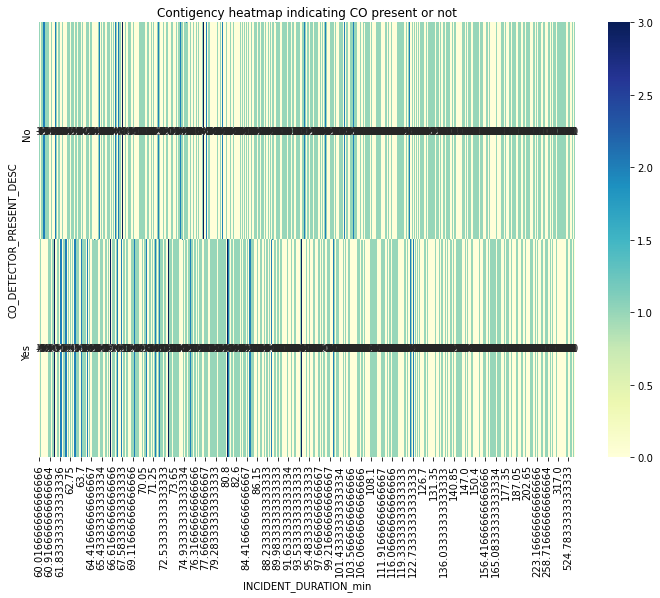

In [740]:
# Plotting contigency table on a heatmap 
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")
plt.title("Contigency heatmap indicating CO present or not");

In [765]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value, chi-square statistic and dof
print("The p-value is ", p)
print("The chi-square test statistic is ", c)
print("The degree of freedom is", dof)

The p-value is  0.3890778386842555
The chi-square test statistic is  1615.3191403179535
The degree of freedom is 1600
